# Adaptive Hit Miss POD

In [1]:
import numpy as np
import openturns as ot
import otpod
import warnings
import os
from distutils.version import LooseVersion
warnings.filterwarnings("ignore")
# enable display figure in notebook
try:
    %matplotlib inline
except:
    pass

In [9]:
# The Hit/Miss function is build by executing "Make_HM.py"
# The function is called "MyHM"
base_dir = os.getcwd()
while base_dir.split('/')[-1] != 'otpod':
    base_dir = os.path.dirname(base_dir)
filename = base_dir + os.sep + 'doc' + os.sep + 'source' + os.sep + 'examples' + os.sep + 'Make_HM.py'
exec(open(filename).read())

-----------------------------------
The function 'MyHM' has been loaded
MyHM inputs dimension : 4
MyHM output dimension : 
1 if signal > 33
0 if signal < 33


In [3]:
n_ini = 100
inputDOE = np.array([np.random.uniform(x_min[i],
             x_max[i],n_ini) 
             for i in range(d)]).T
outputDOE = MyHM(inputDOE)

Building the classifier
Start the improvement loop
Adding points: [========------------------------------------------] 16.67% 

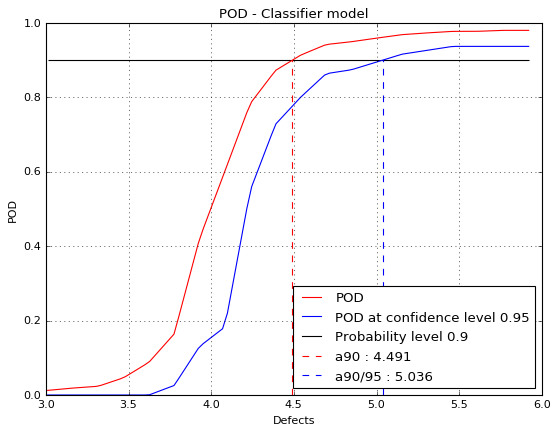

Adding points: [=================---------------------------------] 33.33% 

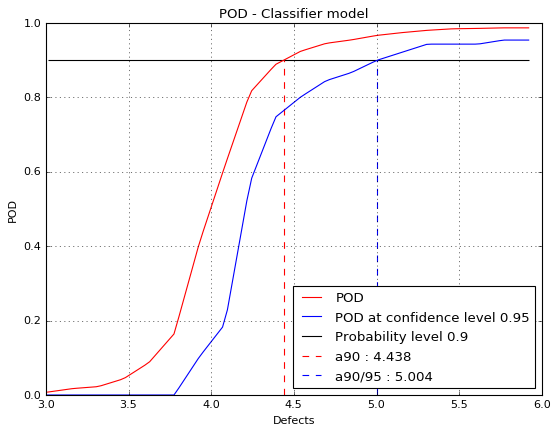

Adding points: [=========================-------------------------] 50.00% 

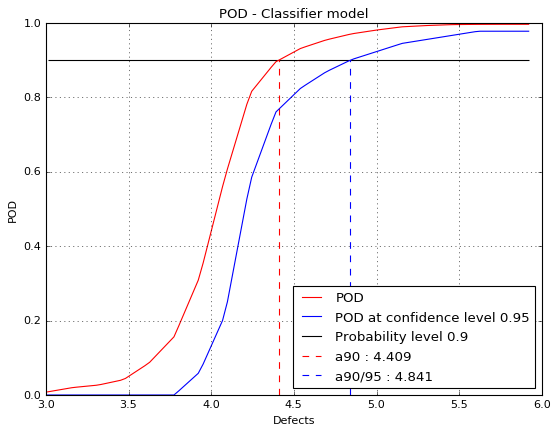

Adding points: [=================================-----------------] 66.67% 

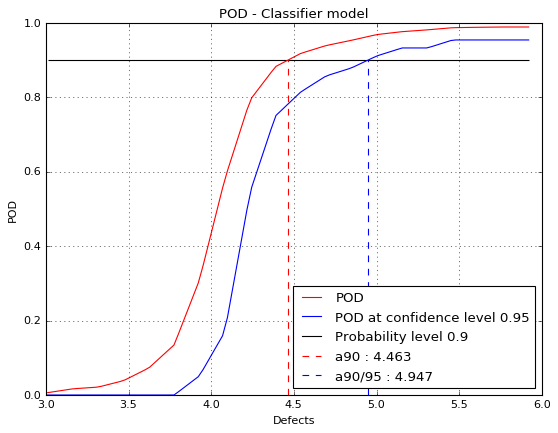

Adding points: [==========================================--------] 83.33% 

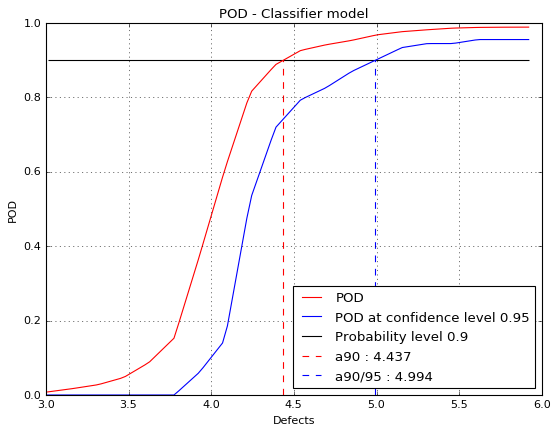

Adding points: [==================================================] 100.00% Done


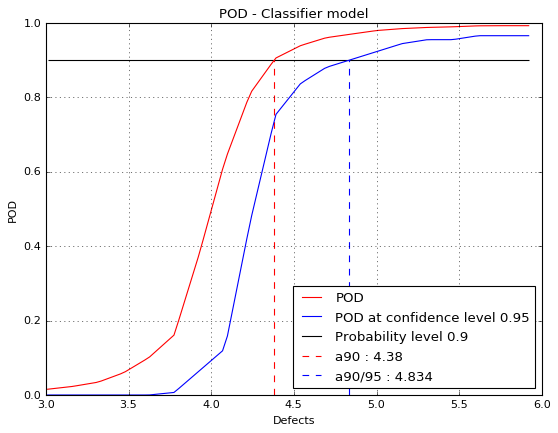

In [4]:
n_more = 30
# Add n_more points with the adaptive algorithm
# 5 points are added at each iteration
hitmiss_algo = res_algo = otpod.AdaptiveHitMissPOD(inputDOE, outputDOE, MyHM, n_more)
hitmiss_algo.setClassifierType("rf")
# Computation of the POD at each iteration activated and display the POD graph
hitmiss_algo.setGraphActive(True, 0.9, 0.95, 'figure/')
hitmiss_algo.run()

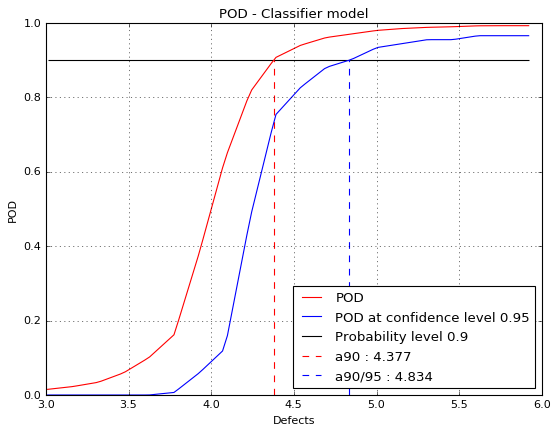

In [5]:
fig, ax = hitmiss_algo.drawPOD(0.9, confidenceLevel=0.95)
fig.show()

## Signal case

Case where the physical model is a function providing the a signal value.
In this case, the detection threshold must be given. The hit miss function
is built inside the AdaptiveHitMissPOD class and is then used in the algorithm.

In [6]:
inputSample = ot.NumericalSample(
    [[4.59626812e+00, 7.46143339e-02, 1.02231538e+00, 8.60042277e+01],
    [4.14315790e+00, 4.20801346e-02, 1.05874908e+00, 2.65757364e+01],
    [4.76735111e+00, 3.72414824e-02, 1.05730385e+00, 5.76058433e+01],
    [4.82811977e+00, 2.49997658e-02, 1.06954641e+00, 2.54461380e+01],
    [4.48961094e+00, 3.74562922e-02, 1.04943946e+00, 6.19483646e+00],
    [5.05605334e+00, 4.87599783e-02, 1.06520409e+00, 3.39024904e+00],
    [5.69679328e+00, 7.74915877e-02, 1.04099514e+00, 6.50990466e+01],
    [5.10193991e+00, 4.35520544e-02, 1.02502536e+00, 5.51492592e+01],
    [4.04791970e+00, 2.38565932e-02, 1.01906882e+00, 2.07875350e+01],
    [4.66238956e+00, 5.49901237e-02, 1.02427200e+00, 1.45661275e+01],
    [4.86634219e+00, 6.04693570e-02, 1.08199374e+00, 1.05104730e+00],
    [4.13519347e+00, 4.45225831e-02, 1.01900124e+00, 5.10117047e+01],
    [4.92541940e+00, 7.87692335e-02, 9.91868726e-01, 8.32302238e+01],
    [4.70722074e+00, 6.51799251e-02, 1.10608515e+00, 3.30181002e+01],
    [4.29040932e+00, 1.75426222e-02, 9.75678838e-01, 2.28186756e+01],
    [4.89291400e+00, 2.34997929e-02, 1.07669835e+00, 5.38926138e+01],
    [4.44653744e+00, 7.63175936e-02, 1.06979154e+00, 5.19109415e+01],
    [3.99977452e+00, 5.80430585e-02, 1.01850716e+00, 7.61988190e+01],
    [3.95491570e+00, 1.09302814e-02, 1.03687664e+00, 6.09981789e+01],
    [5.16424368e+00, 2.69026464e-02, 1.06673711e+00, 2.88708887e+01],
    [5.30491620e+00, 4.53802273e-02, 1.06254792e+00, 3.03856837e+01],
    [4.92809155e+00, 1.20616369e-02, 1.00700410e+00, 7.02512744e+00],
    [4.68373805e+00, 6.26028935e-02, 1.05152117e+00, 4.81271603e+01],
    [5.32381954e+00, 4.33013582e-02, 9.90522007e-01, 6.56015973e+01],
    [4.35455857e+00, 1.23814619e-02, 1.01810539e+00, 1.10769534e+01]])

signals = ot.NumericalSample(
    [[ 37.305445], [ 35.466919], [ 43.187991], [ 45.305165], [ 40.121222], [ 44.609524],
     [ 45.14552 ], [ 44.80595 ], [ 35.414039], [ 39.851778], [ 42.046049], [ 34.73469 ],
     [ 39.339349], [ 40.384559], [ 38.718623], [ 46.189709], [ 36.155737], [ 31.768369],
     [ 35.384313], [ 47.914584], [ 46.758537], [ 46.564428], [ 39.698493], [ 45.636588],
     [ 40.643948]])

# detection threshold
detection = 38

# Select point as initial DOE
inputDOE = inputSample[:]
outputDOE = signals[:]

# simulate the true physical model
basis = ot.ConstantBasisFactory(4).build()
covModel = ot.SquaredExponential([5.03148,13.9442,20,20], [15.1697])
if LooseVersion(ot.__version__) >= '1.9':
    krigingModel = ot.KrigingAlgorithm(inputSample, signals, covModel, basis)
else:
    krigingModel = ot.KrigingAlgorithm(inputSample, signals, basis, covModel)
krigingModel.run()
physicalModel = krigingModel.getResult().getMetaModel()

In [7]:
adaptivePOD = otpod.AdaptiveHitMissPOD(inputDOE, outputDOE, physicalModel, 100, detection)
adaptivePOD.run()

Building the classifier
Start the improvement loop
Adding points: [==================================================] 100.00% Done


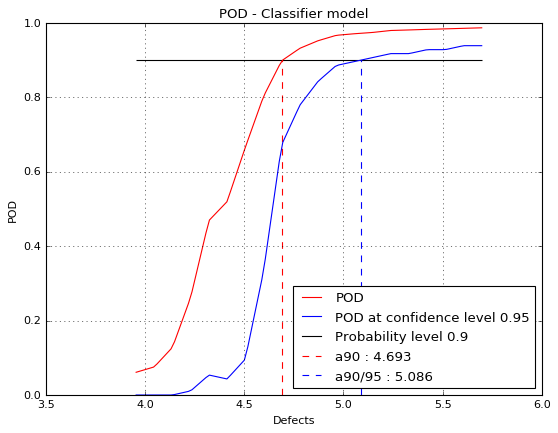

In [8]:
fig, ax = adaptivePOD.drawPOD(0.9, confidenceLevel=0.95)
fig.show()